# Questions by Andrea Morales

### Import modules

In [1]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df: pd.DataFrame = pd.read_csv('./data/tidy_seer_breast_cancer_dataset.csv', sep=',')
df.head(5)

,age,race,marital_status,t_stage,n_stage,6th_stage,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,regional_node_positive,survival_months,status
0,43,Other,Married,T2,N3,IIIC,Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,Other,Married,T2,N2,IIIA,Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married,T2,N1,IIB,Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married,T2,N2,IIIA,Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## BEFORE START
    Before making any studio of this dataset, we need to make a global look to be able to make a more relevant and specific study later on.
--- 

## Question 1
    To start with, we can do a histogram to check the frecuency in numerical columns to see if we can extract any conclusion.

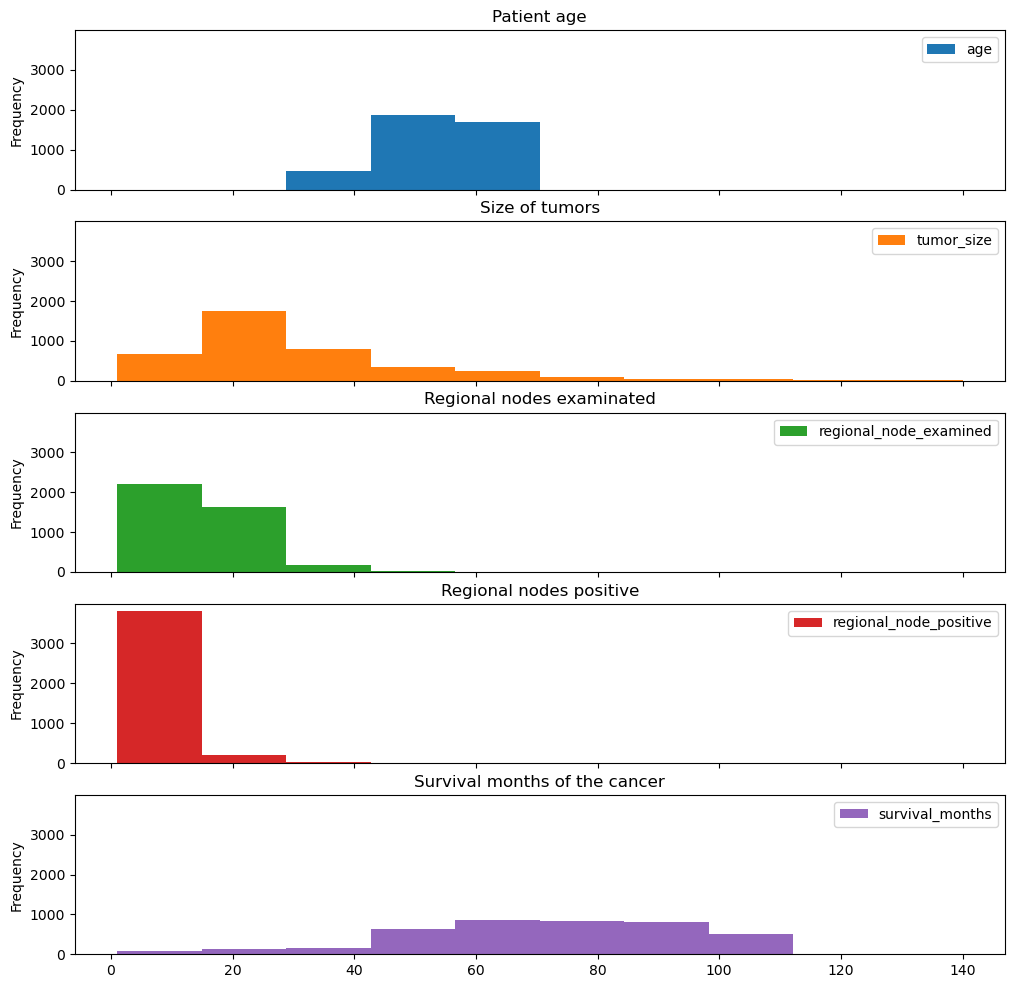

In [2]:
title_list: list[str] = ['Patient age', 'Size of tumors', 'Regional nodes examinated', 'Regional nodes positive', 'Survival months of the cancer']
hist = df.plot(figsize = (12,12),grid= False, sharex=True,sharey=True, kind='hist', subplots=True, title= title_list)

---

### _Conclusion of the histogram_

  With this histogram we can conclude
  -  The age of the patients clasifies in a range of 25-65 years
  -  The most usual size of the tumor is a range of 18-25 mm.
  -  It is usually to examine a range of 1-18 nodes.
  -  That number of nodes examinated tend to be positve in cancer.
  -  And the breast cancer has an average duration of 60 months usually.  

---

## 1.1 The status 
    But we are interested the way it concern to the status of the patients, there is someting different depending in the status?

Text(0.5, 1.02, 'Pair plot based on the patient status')

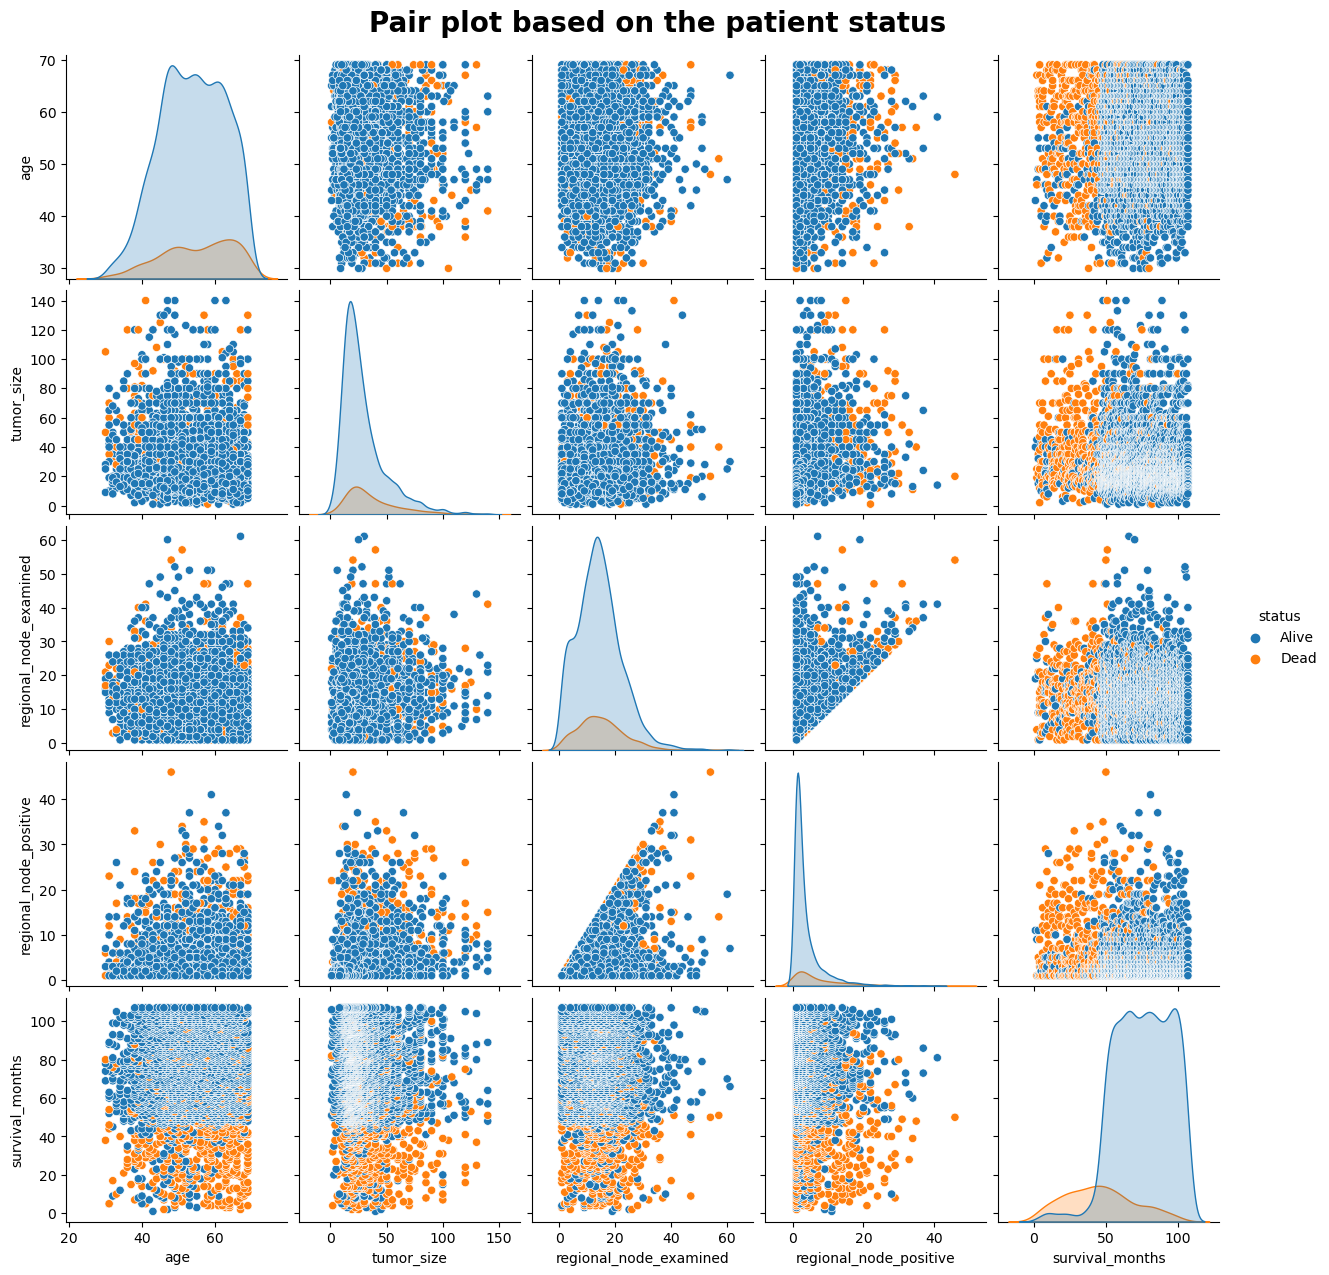

In [3]:
plt.rcParams['font.size']= 10

pairplot = sn.pairplot(df,hue='status')
pairplot.fig.suptitle("Pair plot based on the patient status", y=1.02 , size=20, weight='bold')

---

### _Conclusion of the pair plot_
  - There ir no significant difference between data of alive patients and dead patients.
  - We can see a very slightly difference between the number of regional_node_positve and survival_moths of the cancer.
  
    - The dead patients tend to have more node positive than alive patients. 

---

## Question 2
    Maybe there are some colums that are directly relationed with others and can influnciate in the diagnosis.

    Proceed to do a heat map to check it.

In [4]:
corrMatrix = df.corr()
corrMatrix

,age,tumor_size,regional_node_examined,regional_node_positive,survival_months
age,1.000000,-0.077215,-0.033345,0.012586,-0.009390
tumor_size,-0.077215,1.000000,0.104352,0.242322,-0.086901
regional_node_examined,-0.033345,0.104352,1.000000,0.411580,-0.022054
regional_node_positive,0.012586,0.242322,0.411580,1.000000,-0.135214
survival_months,-0.009390,-0.086901,-0.022054,-0.135214,1.000000


>The number that are positive indicates that there are directly proportional to each other.

>But in other hand if has negative numbers means that this columns are inversely proportional.

Text(0.5, 1.0, 'Heatmap of dataset columns')

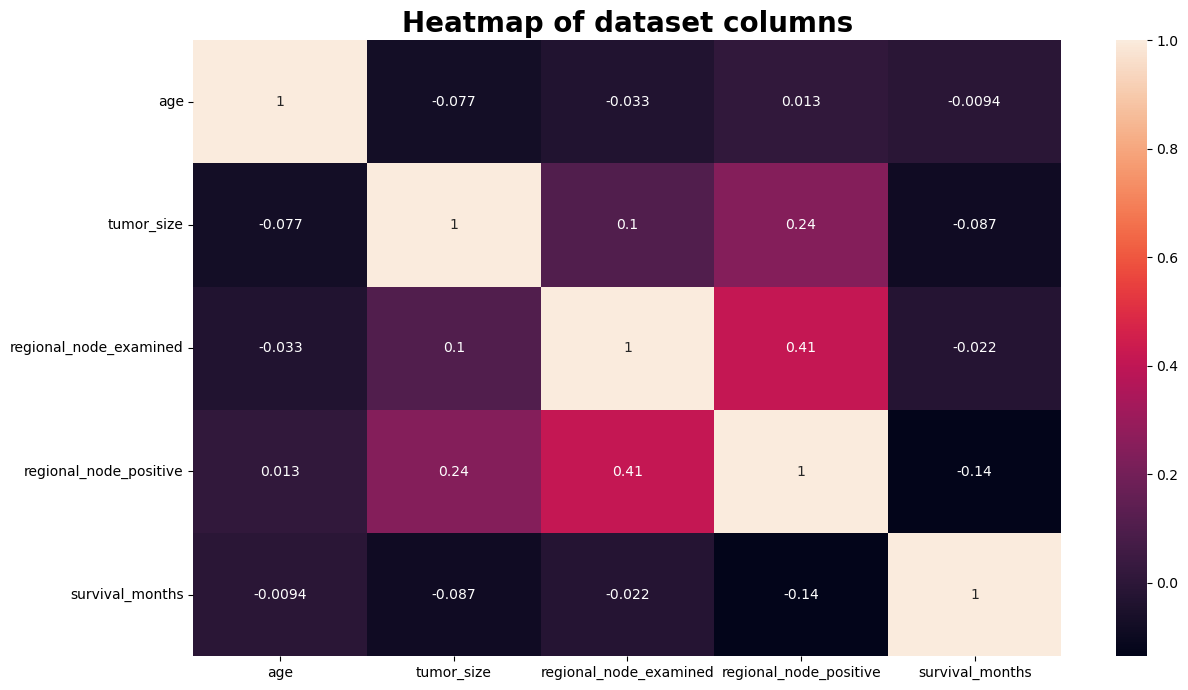

In [5]:
plt.figure(figsize=(14, 8))
ax = plt.axes()
sn.heatmap(corrMatrix, annot=True, ax = ax)
ax.set_title('Heatmap of dataset columns', fontweight="bold", fontdict={'fontsize': 20})

---

### _Conclusion of the heatmap_
    With this heatmap we can conclude
    -  Regional_node_positive, regional_node_examined, tumor_size are directly proportional to each other.
    -  Survival_months is inversely proportional with the others
    -  Age has a relation slightly directly proporcional with regional_node_positive

---

## Question 3
    As we have seen above, could be a relation with the age of the patient and the node positeve founded.

    Proceed to check how relationed the age with the node positives.
    
    First of all, groupby age to groups all the data.

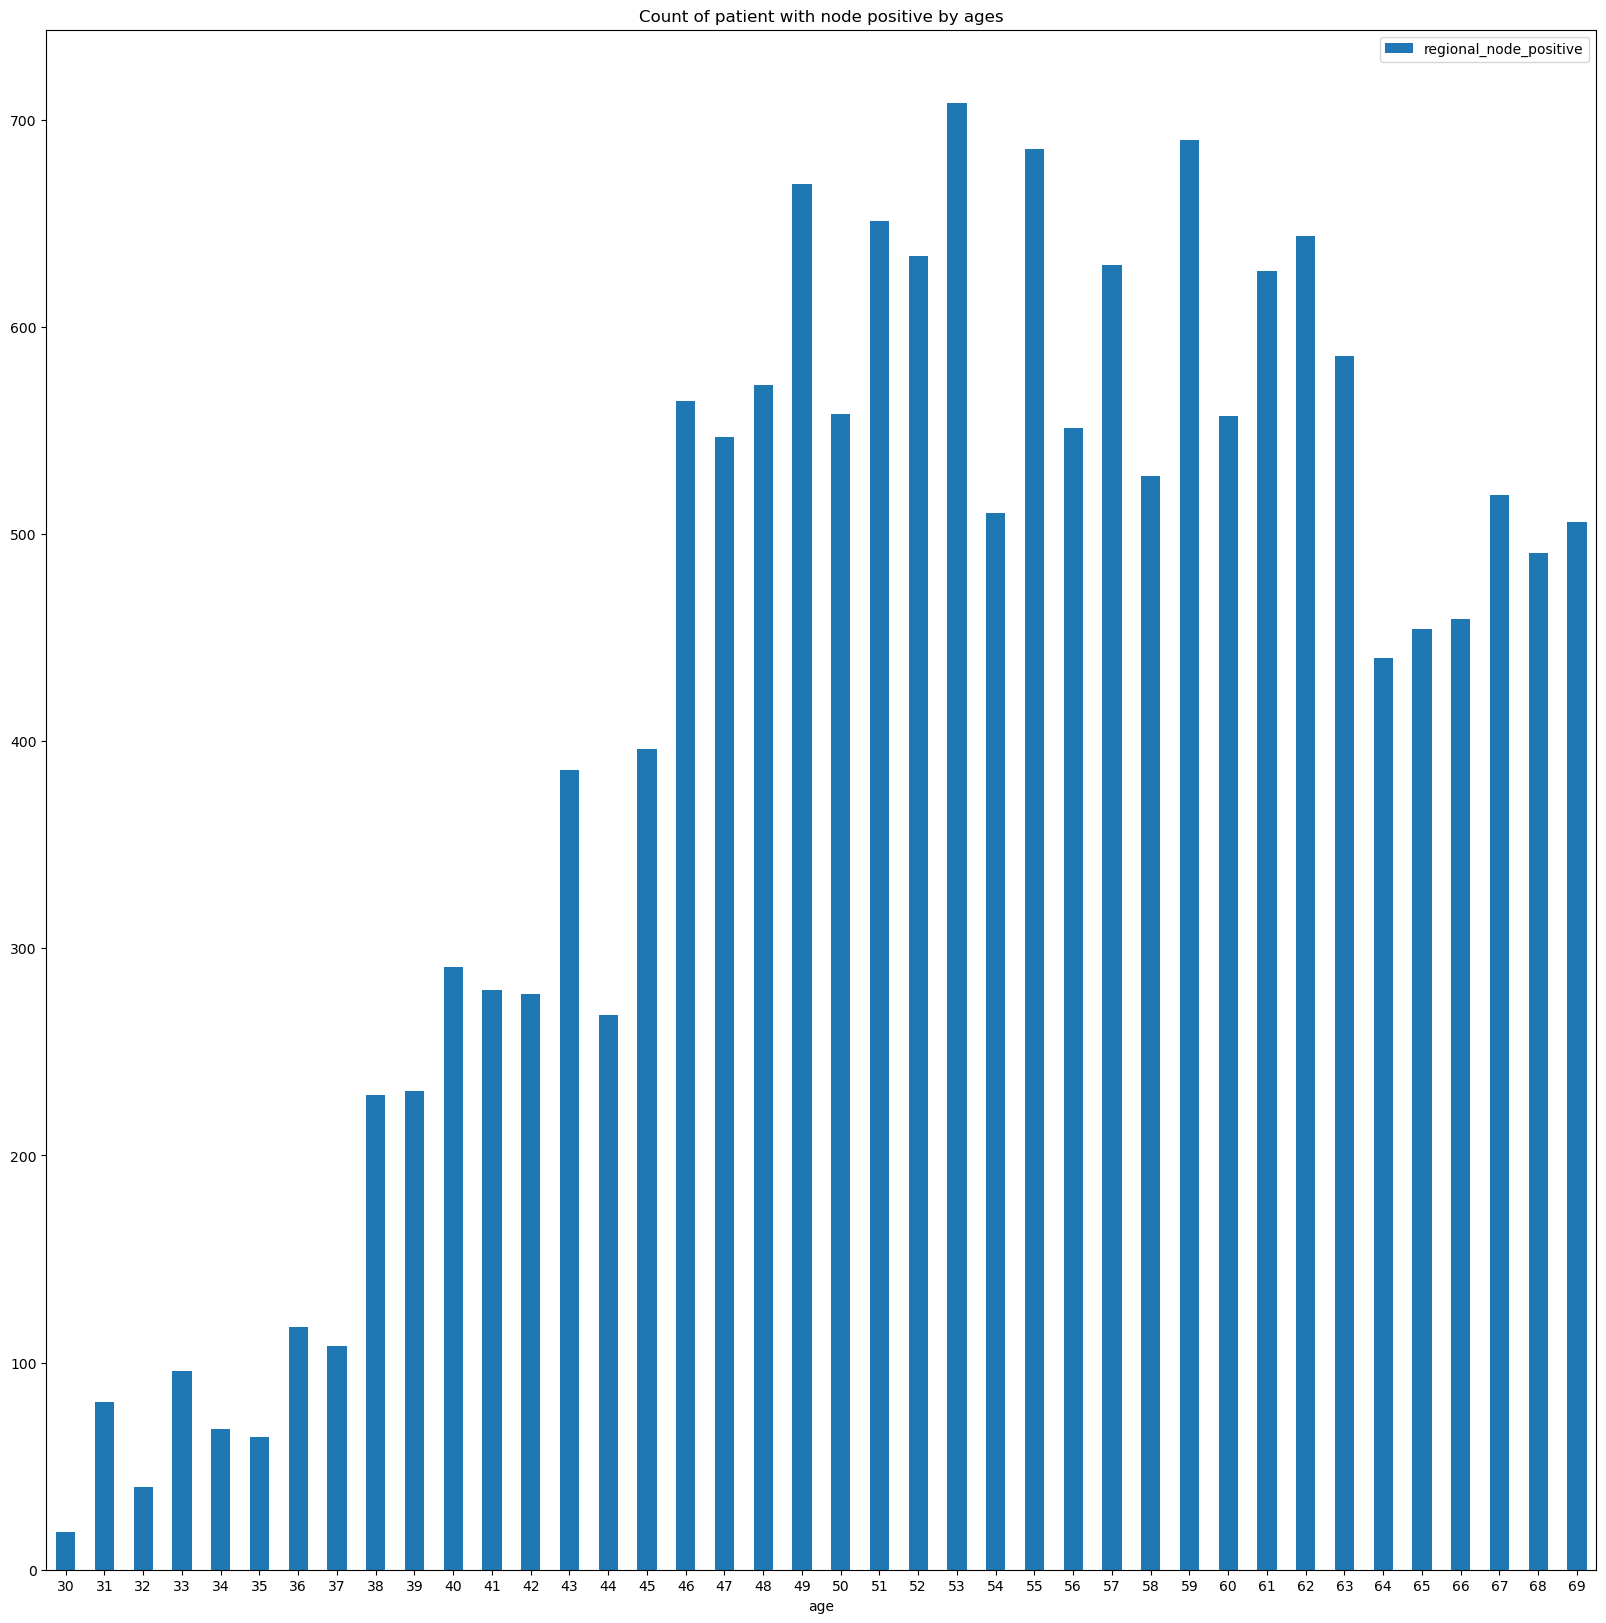

In [6]:
#Groupby by age and sum all the numeric data to see if there is a relation with the age and the regional_node_positive
barplot =df.groupby(by='age').sum()
barplot = barplot.reset_index()

ax = barplot.plot(x="age", y="regional_node_positive", kind="bar", rot=0, figsize=(20,20), title="Count of patient with node positive by ages")

---

### _Conclusion of the plot_
- As seen in the first plot, the histogram, this plot is pretty similar with the age plot in the histogram.
- That confirms that the range of women in 50-63 years are more tested positive in breast cancer-
- Furthermore, we can see that in the age of 53, 59, 55, 49 in this order have more probabilities to have regional node positive on breast cancer.

---